# Mandelbrot Set

In [1]:
%matplotlib inline

## Dependencies

In [2]:
import numpy as np
np.__version__

'1.16.3'

In [3]:
import matplotlib
matplotlib.__version__

'3.0.3'

## How to Plot Graphics

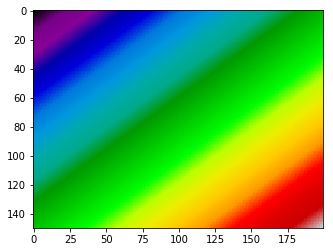

In [4]:
import matplotlib.pyplot as plt

def f(x,y): return (x+y)

x = np.linspace(-2,0.5,200)
y = np.linspace(-1.3,1.3,150)
X,Y = np.meshgrid(x,y)
plt.imshow(f(X,Y), cmap='nipy_spectral')
plt.show()

## Prepare a Complex Plane

First a plane holding the values for C in Z=Z*Z+C is prepared

In [5]:
(m, n) = (4, 3)

Use numpy's *linspace*, *reshape*, then combine to create the complex plane.

In [6]:
x = np.linspace(-1, 1, num=m)
print(x)
x = x.reshape((1, m))
print(x)
y = np.linspace(-1, 1, num=n).reshape((n, 1))
print(y)
C = x + y * 1j
print(C)
print(C[0][0])

[-1.         -0.33333333  0.33333333  1.        ]
[[-1.         -0.33333333  0.33333333  1.        ]]
[[-1.]
 [ 0.]
 [ 1.]]
[[-1.        -1.j -0.33333333-1.j  0.33333333-1.j  1.        -1.j]
 [-1.        +0.j -0.33333333+0.j  0.33333333+0.j  1.        +0.j]
 [-1.        +1.j -0.33333333+1.j  0.33333333+1.j  1.        +1.j]]
(-1-1j)


Simplify things... Using numpy's *[ogrid](https://www.numpy.org/devdocs/reference/generated/numpy.ogrid.html)*:

> However, if the step length is a complex number (e.g. 5j), then the integer part of its magnitude is interpreted as specifying the number of points to create between the start and stop values, where the stop value is inclusive.

In [7]:
y,x = np.ogrid[ -1:1:n*1j, -1:1:m*1j ]
print(x)
print(y)
C = x + y * 1j
print(C)
print(C[0][0])

[[-1.         -0.33333333  0.33333333  1.        ]]
[[-1.]
 [ 0.]
 [ 1.]]
[[-1.        -1.j -0.33333333-1.j  0.33333333-1.j  1.        -1.j]
 [-1.        +0.j -0.33333333+0.j  0.33333333+0.j  1.        +0.j]
 [-1.        +1.j -0.33333333+1.j  0.33333333+1.j  1.        +1.j]]
(-1-1j)


## Render a Mandelbrot Set

Using numpy mathematical functions...

Some matplotlib's [Colormaps](https://matplotlib.org/examples/color/colormaps_reference.html):

In [8]:
colormap = [ 'flag', 'prism', 'gist_earth', 'nipy_spectral', 'jet', 'bone', 'binary', 'RdGy', 'PRGn' ]


In [9]:
def mandel ( xrange = (-2, 0.6), yrange = (-1, 1), maxiter = 255 ):
    global x, y, N
    (xmin, xmax) = xrange
    (ymin, ymax) = yrange
    (m, n) = (400, 300)
    bailout = 2.0

    y,x = np.ogrid[ ymin:ymax:n*1j, xmin:xmax:m*1j ]
    C = x+y*1j
    Z = np.zeros(C.shape, dtype=complex)
    M = np.full(C.shape, True, dtype=bool)
    N = np.zeros(C.shape)
    for i in range(maxiter):
        Z[M] = Z[M] ** 2 + C[M]
        M[np.abs(Z) > bailout] = False
        N[M] = i

In [10]:
def mandel_plot( colormap = colormap[0], labelRotation = False, fileName = '' ):
    plt.imshow(np.uint8(np.flipud(255 - N)), cmap=colormap, extent=[x[0][0],x[0][-1],y[0][0],y[-1][0]])
    if labelRotation:
        plt.tick_params(axis='x', labelrotation=55)
    plt.colorbar()
    plt.title('Mandelbrot Set')
    if len(fileName) > 0:
        plt.savefig(fileName, dpi=150)
    plt.show()

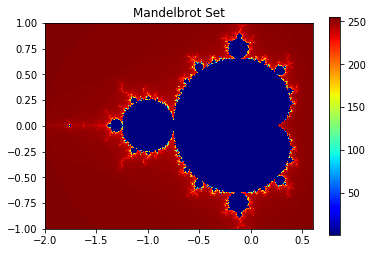

In [11]:
mandel()
mandel_plot( colormap[4], fileName = 'out.png' )

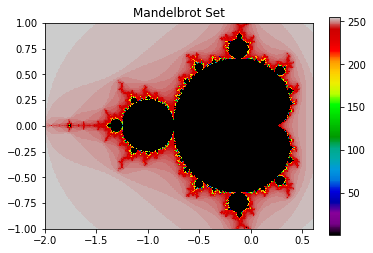

In [12]:
mandel_plot( colormap[3] )

In [13]:
mandel ( xrange = (-1.767145, -1.767115), yrange = (0.040468, 0.040490), maxiter = 1300 )

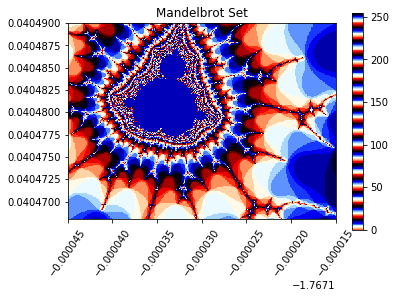

In [14]:
mandel_plot( colormap[0], labelRotation = True )

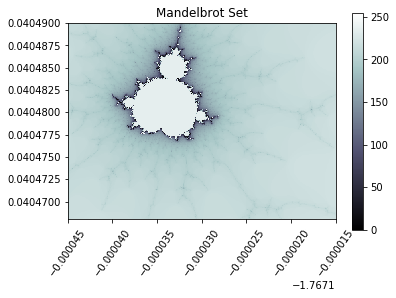

In [15]:
mandel_plot( colormap[5], labelRotation = True )

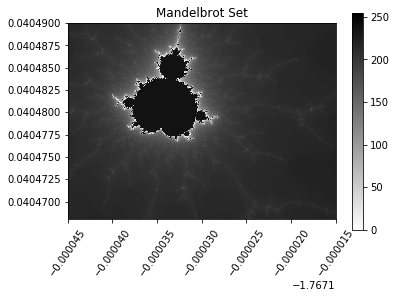

In [16]:
mandel_plot( colormap[6], labelRotation = True )

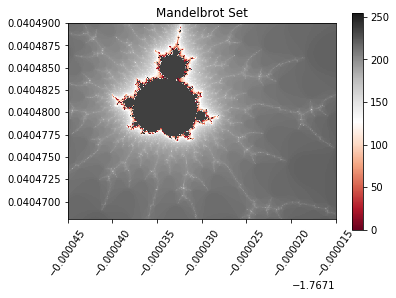

In [17]:
mandel_plot( colormap[7], labelRotation = True )

In [18]:
mandel ( xrange = (-1.767138, -1.767136), yrange = (0.0404825, 0.0404838), maxiter = 2600 )

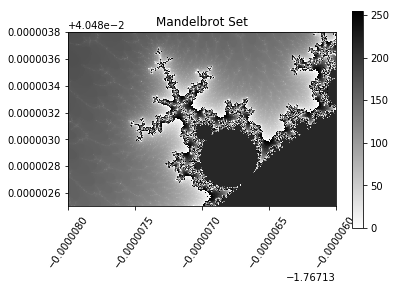

In [19]:
mandel_plot( colormap[6], labelRotation = True )

In [20]:
mandel ( xrange = (-1.767138, -1.767136), yrange = (0.0404825, 0.0404838), maxiter = 500 )

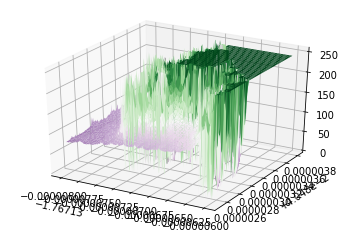

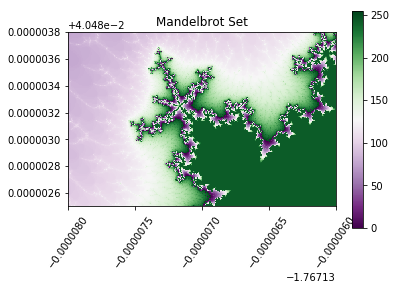

In [21]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x,y,np.uint8(np.flipud(N)), linewidth=0.2, antialiased=True, cmap=colormap[8])
plt.show()

plt.imshow(np.uint8(np.flipud(N)), cmap=colormap[8], extent=[x[0][0],x[0][-1],y[0][0],y[-1][0]])
plt.tick_params(axis='x', labelrotation=55)
plt.colorbar()
plt.title('Mandelbrot Set')
plt.show()